project overview

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

step 1: load the digits dataset(https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_digits.html)

In [ ]:
# load the digits from set and assign variables for the data and target
digits = load_digits()
X = digits.data
y = digits.target

# print dataset, number of features and classes to verify all data was loaded correctly
print(f"Dataset size: {X.shape[0]} samples")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

step 2: split the datasets into training(70%) and testing(30%) batches

In [3]:
# split the dataset into training (70) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# print values of training/testing
print(f"Training size: {X_train.shape[0]} samples")
print(f"Testing size: {X_test.shape[0]} samples")

Training size: 1257 samples
Testing size: 540 samples


step 3: use MLPClassifier to build the forward feeding neural network and train

what do these things mean?

activation='relu'   ~ mathematical function that determines how/if neurons passes to the next layer (faster than sigmoid)
solver='adam'       ~ learning alorithm that adjusts weights to minimize training errors (sgd requires more manual taining)
max_iter=500        ~ the maximum number of iteration the model must learn correct identification

relu + adam are considered the standard combination when it comes to neural network projects

In [5]:
# build the neural network
mlpc = MLPClassifier(hidden_layer_sizes=(100,), 
                     activation='relu',  
                     solver='adam', 
                     max_iter=500, 
                     random_state=42)

# train the model with training data set
mlpc.fit(X_train, y_train)

# display training message
print("test -- training has been completed")

test -- training has been completed


step 4: display the model's accuracy with a classification report

In [7]:
# evaluate the model with training data
y_train_pred = mlpc.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# evaluate the model with the test data
y_test_pred = mlpc.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# display a classification report w/ accuracies of 3 decimal points
print(f"Training Accuracy: {train_acc:.5f}")
print(f"Test Accuracy: {test_acc:.5f}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred, target_names=digits.target_names.astype(str)))

Training Accuracy: 1.00000
Test Accuracy: 0.96667

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.98      0.96      0.97        50
           2       0.94      1.00      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.92      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.89      0.93      0.91        43
           9       0.94      0.98      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



step 5: visualize the test images and their predicted labels

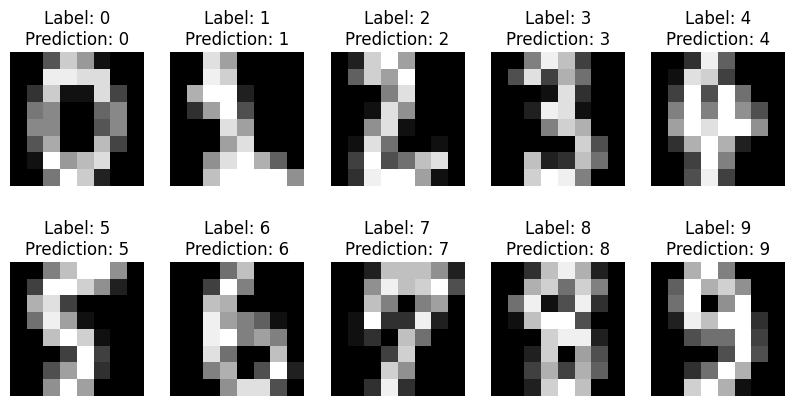

In [8]:
unique_class = np.unique(y_test)

plt.figure(figsize=(10,5))

# loop through each item
for _, label in enumerate(unique_class):
    # find the first test sample for each class
    idx = np.where(y_test == label)[0][0]
    image = X_test[idx].reshape(8,8)

    # create the display with labels
    plt.subplot(2, 5, _ + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {label}\nPrediction: {y_test_pred[idx]}")

# print the final output! :>
plt.show()